<h2> Buildind a Handwritten Digit Classifier </h2>  

In this project we will use  deep, feedforward neural networks to help  classify images of handwritten digits from this data set http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [4]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

looks like the data is in the form of dictionaries so lets look at the keys

In [5]:
digits.keys()

dict_keys(['data', 'target', 'images', 'target_names', 'DESCR'])

we are interested in a couple of keys: data, that holds the images and target that holds the true label of that image

In [6]:
images_df = pd.DataFrame(digits['data'])
labels = pd.Series(digits['target'])

In [7]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
0     1797 non-null float64
1     1797 non-null float64
2     1797 non-null float64
3     1797 non-null float64
4     1797 non-null float64
5     1797 non-null float64
6     1797 non-null float64
7     1797 non-null float64
8     1797 non-null float64
9     1797 non-null float64
10    1797 non-null float64
11    1797 non-null float64
12    1797 non-null float64
13    1797 non-null float64
14    1797 non-null float64
15    1797 non-null float64
16    1797 non-null float64
17    1797 non-null float64
18    1797 non-null float64
19    1797 non-null float64
20    1797 non-null float64
21    1797 non-null float64
22    1797 non-null float64
23    1797 non-null float64
24    1797 non-null float64
25    1797 non-null float64
26    1797 non-null float64
27    1797 non-null float64
28    1797 non-null float64
29    1797 non-null float64
30    1797 non-null float64
31    1797 non-null float

In [8]:
labels.shape

(1797,)

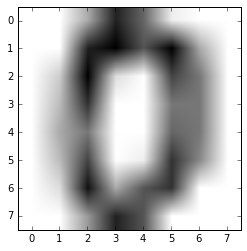

In [9]:
first_image = images_df.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

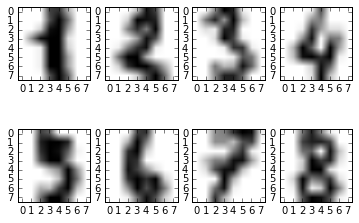

In [10]:
i, ax = plt.subplots(2, 4);

ax[0, 0].imshow(images_df.iloc[1].values.reshape(8,8), cmap='gray_r')
ax[0, 1].imshow(images_df.iloc[2].values.reshape(8,8), cmap='gray_r')
ax[0, 2].imshow(images_df.iloc[3].values.reshape(8,8), cmap='gray_r')
ax[0, 3].imshow(images_df.iloc[4].values.reshape(8,8), cmap='gray_r')

ax[1, 0].imshow(images_df.iloc[5].values.reshape(8,8), cmap='gray_r')
ax[1, 1].imshow(images_df.iloc[6].values.reshape(8,8), cmap='gray_r')
ax[1, 2].imshow(images_df.iloc[7].values.reshape(8,8), cmap='gray_r')
ax[1, 3].imshow(images_df.iloc[8].values.reshape(8,8), cmap='gray_r')

<h3>Using Knearest neighbor for prediction</h3>

In [11]:
def train(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(images_df):
        train_features, test_features = images_df.loc[train_index], images_df.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [12]:
knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9677233358079684

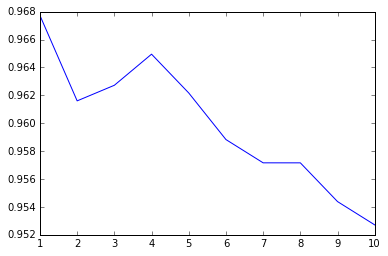

In [13]:
k_list = [1,2,3,4,5,6,7,8,9,10]
k_list_accuracy = []
for i in k_list:
    knn_accuracies = cross_validate(i)
    k_list_accuracy.append(np.mean(knn_accuracies))

plt.plot(k_list,k_list_accuracy);

We can see the as we increase the Ks in knearest neighbors the accuracy goes down so the optimsl k seems to be 1

<h3>Prediction with Neural Network model</h3>

In [17]:
def cross_validate_nn(num_neurons):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(images_df):
        train_features, test_features = images_df.loc[train_index], images_df.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        mlp = MLPClassifier(hidden_layer_sizes=num_neurons)
        mlp.fit(train_features,train_labels)
        overall_accuracy = test(mlp, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



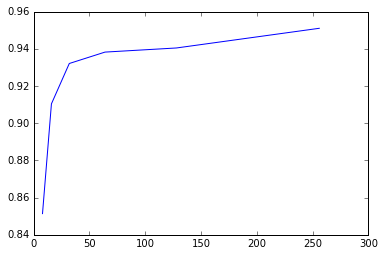

In [18]:
neuron_list = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_accuracies_list = []
for n in neuron_list:
    nn_accuracy = cross_validate_nn(n)
    nn_accuracies_list.append(np.mean(nn_accuracy))

plt.plot(neuron_list,nn_accuracies_list);

Seems like the more neurons we add to the hidden layer the better the model is doing. Having said that, Knearest neighbors reached 96.8% accuracy and the single hidden layer NN reached around 95% and it took longer to compute so we might be better of using the Knearest neighbor. We should check the NN with more hidden layers to see if it improves.

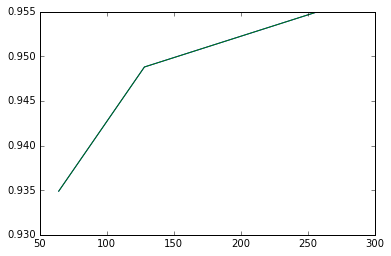

In [19]:
neuron_list = [
    (64,64),
    (128,128),
    (256,256)
]
nn_two_accuracies_list = []
for n in neuron_list:
    nn_accuracy = cross_validate_nn(n)
    nn_two_accuracies_list.append(np.mean(nn_accuracy))

plt.plot(neuron_list,nn_two_accuracies_list);

The accuracy increaed a little bit but still didn't reach the leve of the Knearest neighbors. Let's try adding another hidden layer


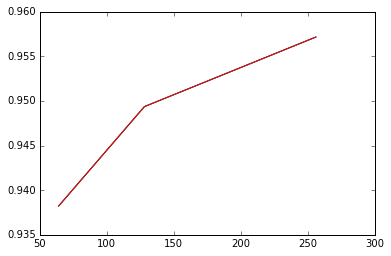

In [20]:
neuron_list = [
    (64,64,64),
    (128,128,128),
    (256,256,256)
]
nn_three_accuracies_list = []
for n in neuron_list:
    nn_accuracy = cross_validate_nn(n)
    nn_three_accuracies_list.append(np.mean(nn_accuracy))

plt.plot(neuron_list,nn_three_accuracies_list);

Not much of a change. Let's try it with more layers and more newurons

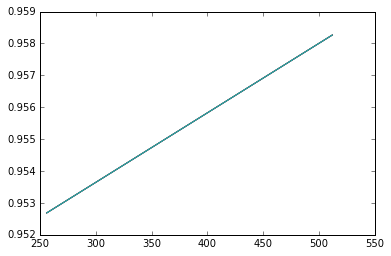

In [22]:
neuron_list = [
    (256,256,256,256),
    (512,512,512,512)
]
nn_four_accuracies_list = []
for n in neuron_list:
    nn_accuracy = cross_validate_nn(n)
    nn_four_accuracies_list.append(np.mean(nn_accuracy))

plt.plot(neuron_list,nn_four_accuracies_list);

Again not much improvement so we are bteer of staying with the k nearest neighbor  with k=1 for this task

To make sure we are not over fitting, lets try again the 3 hidden layers with 6 fold cross validation (since there was not much change between 3 and 4 hidden layers)

In [24]:
def cross_validate_nn_6(num_neurons):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2)
    for train_index, test_index in kf.split(images_df):
        train_features, test_features = images_df.loc[train_index], images_df.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        mlp = MLPClassifier(hidden_layer_sizes=num_neurons)
        mlp.fit(train_features,train_labels)
        overall_accuracy = test(mlp, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



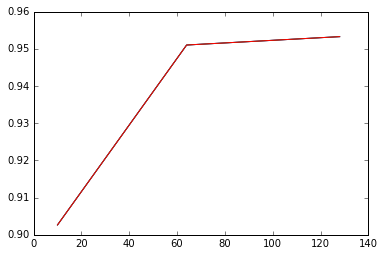

In [26]:
neuron_list = [
    (10,10,10),
    (64,64,64),
    (128,128,128)
]
nn_three_accuracies_list = []
for n in neuron_list:
    nn_accuracy = cross_validate_nn_6(n)
    nn_three_accuracies_list.append(np.mean(nn_accuracy))

plt.plot(neuron_list,nn_three_accuracies_list);

Even with more layers and more folds the models is not going over 96% accuracy